In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score,accuracy_score

In [7]:
# categories = ['comp.sys.mac.hardware', 'comp.sys.ibm.pc.hardware', 'comp.graphics','comp.windows.x' ,'sci.space','sci.electronics']
newsgroups_data = fetch_20newsgroups(subset='all' ,remove=('headers', 'footers', 'quotes'))

In [3]:
def load_images(file_path):
    with open(file_path, 'rb') as f:
        # Read the magic number and metadata
        magic_number = int.from_bytes(f.read(4), byteorder='big')  # Magic number
        num_images = int.from_bytes(f.read(4), byteorder='big')    # Number of images
        num_rows = int.from_bytes(f.read(4), byteorder='big')      # Rows per image
        num_cols = int.from_bytes(f.read(4), byteorder='big')      # Columns per image

        # Read the image data
        images = np.frombuffer(f.read(), dtype=np.uint8)
        images = images.reshape(num_images, num_rows, num_cols)    # Reshape into 3D array
    return images

def load_labels(file_path):
    with open(file_path, 'rb') as f:
        # Read the magic number and metadata
        magic_number = int.from_bytes(f.read(4), byteorder='big')  # Magic number
        num_labels = int.from_bytes(f.read(4), byteorder='big')    # Number of labels

        # Read the label data
        labels = np.frombuffer(f.read(), dtype=np.uint8)
    return labels


train_images_file = 'Mnist/train-images.idx3-ubyte'
train_labels_file = 'Mnist/train-labels.idx1-ubyte'
test_images_file = 'Mnist/t10k-images.idx3-ubyte'
test_labels_file = 'Mnist/t10k-labels.idx1-ubyte'

mnist_train_images = load_images(train_images_file)
mnist_train_labels = load_labels(train_labels_file)
mnist_test_images = load_images(test_images_file)
mnist_test_labels = load_labels(test_labels_file)

mnist_feature_names = [f'pixel_{i}' for i in range(784)]
print(f"Number of images: {mnist_train_images.shape[0]}")
print(f"Image shape: {mnist_test_images.shape[0:]}")  # Rows x Columns
print(f"Image shape: {mnist_train_images.shape[1:]}")  # Rows x Columns
print(f"First label: {mnist_train_labels[0]}")

Number of images: 60000
Image shape: (10000, 28, 28)
Image shape: (28, 28)
First label: 5


In [4]:
import re
columns = []
with open('spambase/spambase.names','r') as file:
    for line in file:
        if line[0]=='|' or line[0]=='1' or line[0]=='\n':
            continue
        column_name,_ = line.split(':')
        columns.append(column_name)
columns.append('label')

In [5]:
spambase_df = pd.read_csv('spambase/spambase.data',names=columns)
spambase_features=columns

In [6]:
spambase_df

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,label
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


## Problem 1

In [3]:
def Logistic_Regression(X_train,X_test,y_train,y_test,dataset_name,feature_names):
    log_reg = LogisticRegression(penalty='l2',solver='liblinear')
    log_reg.fit(X_train,y_train)
    y_pred = log_reg.predict(X_test)
    acc = accuracy_score(y_test,y_pred)
    all_features = np.abs(log_reg.coef_).sum(axis=0)
    top_features = np.argsort(all_features)[-30:]
    top_30_features = [feature_names[i] for i in top_features]
    print('Dataset:',dataset_name)
    print('\nModel: Logistic Regression\n')
    print(f'Accuracy score:%0.3f'% acc)
    print(f'Top 30 Features:',top_30_features)
    
def Decision_Tree(X_train,X_test,y_train,y_test,dataset_name,feature_names):
    decision_tree = DecisionTreeClassifier(max_depth=10)
    decision_tree.fit(X_train,y_train)
    y_pred = decision_tree.predict(X_test)
    acc = accuracy_score(y_test,y_pred)
    top_features = decision_tree.tree_.feature[:30]
    top_30_features = [feature_names[i] for i in top_features]
    print('Dataset:',dataset_name)
    print('\nModel: Decision Tree\n')
    print(f'Accuracy score:%0.3f'% acc)
    print(f'Top 30 Features:',top_30_features)

### MNIST Dataset

In [8]:
# For mnist dataset
def zero_mean_unit_variance_normalization(data):

    mnist_data_normalized_with_unit_var = []
    for image in data:
        image = np.reshape(image,(784,))
        pixel_value_mean = image.mean()
        pixel_value_std = image.std()
        # Shifting scale to [0,1]
        image = (image-pixel_value_mean)/(pixel_value_std)
        mnist_data_normalized_with_unit_var.append(image)
    return mnist_data_normalized_with_unit_var

mnist_train_images_normalized_with_unit_var = zero_mean_unit_variance_normalization(mnist_train_images)
mnist_test_images_normalized_with_unit_var = zero_mean_unit_variance_normalization(mnist_test_images)

In [9]:
X_train,X_test,y_train,y_test = train_test_split(mnist_train_images_normalized_with_unit_var,mnist_train_labels,test_size=0.2)
Logistic_Regression(X_train,X_test,y_train,y_test,'MNIST',mnist_feature_names)

Dataset: MNIST

Model: Logistic Regression

Accuracy score:0.917
Top 30 Features: ['pixel_721', 'pixel_193', 'pixel_136', 'pixel_282', 'pixel_256', 'pixel_93', 'pixel_446', 'pixel_277', 'pixel_501', 'pixel_248', 'pixel_416', 'pixel_418', 'pixel_333', 'pixel_276', 'pixel_474', 'pixel_396', 'pixel_417', 'pixel_388', 'pixel_390', 'pixel_304', 'pixel_705', 'pixel_361', 'pixel_389', 'pixel_332', 'pixel_557', 'pixel_359', 'pixel_612', 'pixel_360', 'pixel_473', 'pixel_362']


In [13]:
X_train=mnist_train_images.reshape(60000,784)
X_train,X_test,y_train,y_test = train_test_split(X_train,mnist_train_labels,test_size=0.2)

In [14]:
Decision_Tree(X_train,X_test,y_train,y_test,'MNIST',mnist_feature_names)

Dataset: MNIST

Model: Decision Tree

Accuracy score:0.851
Top 30 Features: ['pixel_409', 'pixel_434', 'pixel_455', 'pixel_323', 'pixel_489', 'pixel_598', 'pixel_181', 'pixel_542', 'pixel_568', 'pixel_377', 'pixel_782', 'pixel_782', 'pixel_782', 'pixel_271', 'pixel_782', 'pixel_693', 'pixel_782', 'pixel_782', 'pixel_464', 'pixel_545', 'pixel_382', 'pixel_782', 'pixel_782', 'pixel_523', 'pixel_782', 'pixel_782', 'pixel_487', 'pixel_782', 'pixel_782', 'pixel_377']


### Spambase Dataset

In [15]:
X=spambase_df.drop(['label'],axis=1)
y = spambase_df['label']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [18]:
Logistic_Regression(X_train,X_test,y_train,y_test,'Spambase',spambase_features)

Dataset: Spambase

Model: Logistic Regression

Accuracy score:0.935
Top 30 Features: ['word_freq_parts', 'word_freq_650', 'word_freq_internet', 'word_freq_3d', 'word_freq_technology', 'word_freq_over', 'word_freq_re', 'word_freq_pm', 'word_freq_original', 'word_freq_credit', 'word_freq_85', 'word_freq_free', 'word_freq_addresses', 'word_freq_data', 'word_freq_hpl', 'word_freq_business', 'char_freq_#', 'word_freq_cs', 'word_freq_conference', 'word_freq_lab', 'word_freq_project', 'char_freq_;', 'word_freq_order', 'word_freq_edu', 'word_freq_hp', 'word_freq_meeting', 'word_freq_remove', 'word_freq_000', 'char_freq_$', 'word_freq_george']


In [19]:
Decision_Tree(X_train,X_test,y_train,y_test,'Spambase',spambase_features)

Dataset: Spambase

Model: Decision Tree

Accuracy score:0.917
Top 30 Features: ['char_freq_!', 'word_freq_remove', 'char_freq_$', 'word_freq_free', 'word_freq_money', 'capital_run_length_average', 'word_freq_hp', 'word_freq_650', 'capital_run_length_longest', 'word_freq_receive', 'capital_run_length_total', 'capital_run_length_total', 'word_freq_our', 'capital_run_length_total', 'capital_run_length_total', 'word_freq_you', 'capital_run_length_average', 'capital_run_length_total', 'capital_run_length_total', 'word_freq_our', 'capital_run_length_total', 'capital_run_length_total', 'word_freq_receive', 'capital_run_length_total', 'word_freq_data', 'capital_run_length_total', 'capital_run_length_total', 'char_freq_[', 'capital_run_length_total', 'capital_run_length_total']


### 20NG Dataset

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english',max_features=10000,token_pattern='[A-Za-z]+',use_idf=False)  # Remove stopwords and apply TF-IDF
ng_group_tf_vector = vectorizer.fit_transform(newsgroups_data.data)
ng_feature_names = vectorizer.get_feature_names_out()

In [9]:
X = ng_group_tf_vector
y = newsgroups_data.target
X_train,X_test,y_train,y_test =  train_test_split(X,y,test_size=0.2)

In [10]:
Logistic_Regression(X_train,X_test,y_train,y_test,'20NG',ng_feature_names)

Dataset: 20NG

Model: Logistic Regression

Accuracy score:0.703
Top 30 Features: ['hockey', 'gun', 'chip', 'window', 'using', 'year', 'monitor', 'key', 'card', 'program', 'dos', 'problem', 'people', 'file', 'graphics', 'games', 'use', 'mac', 'sale', 'israel', 'drive', 'team', 'government', 'space', 'bike', 'game', 'car', 'x', 'god', 'windows']


In [23]:
Decision_Tree(X_train,X_test,y_train,y_test,'20NG',ng_feature_names)

Dataset: 20NG

Model: Decision Tree

Accuracy score:0.428
Top 30 Features: ['x', 'space', 'mac', 'apple', 'graphics', 'drive', 'orbit', 'window', 'dx', 'circuit', 'zy', 'zy', 'd', 'zy', 'zy', 'problems', 'video', 'zy', 'zy', 'week', 'zy', 'zy', 'zy', 'ide', 'internal', 'cview', 'amp', 'zy', 'zy', 'zy']


## Problem 2

In [24]:
from sklearn.preprocessing import StandardScaler
X_train = mnist_train_images.reshape(60000,784)
X_test = mnist_test_images.reshape(mnist_test_images.shape[0],784)
scaler = StandardScaler()
X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.fit_transform(X_test)

In [25]:
mnist_pca = PCA(n_components=5)
mnist_train_5d = mnist_pca.fit_transform(X_scaled_train)
mnist_test_5d = mnist_pca.fit_transform(X_scaled_test)

In [26]:
mnist_train_5d

array([[-9.22174423e-01, -4.81465431e+00,  6.80340715e-02,
        -8.05625277e+00, -9.81661071e-01],
       [ 8.70897540e+00, -7.75455899e+00, -3.44813925e+00,
        -1.66524700e+00,  8.33608075e-01],
       [ 2.32841127e+00,  9.43172931e+00, -6.18416003e+00,
         1.72612941e+00,  4.09435058e+00],
       ...,
       [-3.77721530e+00, -3.23053370e+00, -3.80581402e+00,
        -7.50622896e+00, -1.35919835e+00],
       [ 1.72237345e+00, -4.94817300e+00,  6.76133333e-03,
         7.15125677e+00, -9.26360836e-01],
       [-1.42725057e+00, -6.17542418e+00, -2.96817750e+00,
        -3.89549417e-01,  3.49391619e+00]])

In [27]:
mnist_pca = PCA(n_components=20)
mnist_train_20d = mnist_pca.fit_transform(X_scaled_train)
mnist_test_20d = mnist_pca.fit_transform(X_scaled_test)

In [28]:
mnist_train_20d

array([[-9.22161327e-01, -4.81478176e+00,  6.75694596e-02, ...,
        -5.13781970e+00,  4.02763589e+00,  3.81401766e+00],
       [ 8.70897650e+00, -7.75440436e+00, -3.44790979e+00, ...,
         8.38640142e-01,  3.39548493e+00,  1.18946549e-01],
       [ 2.32838500e+00,  9.43134937e+00, -6.18409787e+00, ...,
         4.56356401e+00,  5.18324060e+00,  4.70126540e+00],
       ...,
       [-3.77721181e+00, -3.23055989e+00, -3.80620219e+00, ...,
        -7.64033347e-01,  8.95808427e-01,  5.66948843e+00],
       [ 1.72236802e+00, -4.94812031e+00,  6.95373051e-03, ...,
        -2.67808672e+00, -3.41704333e-01, -1.48501996e+00],
       [-1.42725041e+00, -6.17538653e+00, -2.96768331e+00, ...,
         2.11617284e+00,  3.75132280e+00, -3.57586202e+00]])

In [43]:
mnist_log_reg_5d = LogisticRegression(max_iter=1000)
mnist_log_reg_5d.fit(mnist_train_5d,mnist_train_labels)

LogisticRegression(max_iter=1000)

In [44]:
y_pred = mnist_log_reg_5d.predict(mnist_test_5d)
mnist_f1_score = f1_score(mnist_test_labels,y_pred,average='weighted')
mnist_accuracy_score = accuracy_score(mnist_test_labels,y_pred)

In [45]:
print('F1 Score: %0.3f'% mnist_f1_score)
print('Accuracy Score: %0.3f'% mnist_accuracy_score)

F1 Score: 0.608
Accuracy Score: 0.614


In [46]:
mnist_log_reg_20d = LogisticRegression(max_iter=1000)
mnist_log_reg_20d.fit(mnist_train_20d,mnist_train_labels)

LogisticRegression(max_iter=1000)

In [47]:
y_pred = mnist_log_reg_20d.predict(mnist_test_20d)
mnist_f1_score = f1_score(mnist_test_labels,y_pred,average='weighted')
mnist_accuracy_score = accuracy_score(mnist_test_labels,y_pred)

In [48]:
print('F1 Score: %0.3f'% mnist_f1_score)
print('Accuracy Score: %0.3f'% mnist_accuracy_score)

F1 Score: 0.546
Accuracy Score: 0.545


In [58]:
spambase_X=spambase_df.drop(['label'],axis=1)
spambase_y = spambase_df['label']
print('Performence of Spambase data in various dimension:\n')
for D in range(1,spambase_df.shape[1]):
    spambase_pca = PCA(n_components=D)
    spambase_transformed = spambase_pca.fit_transform(spambase_X)
    X_train,X_test,y_train,y_test = train_test_split(spambase_transformed,spambase_y,test_size=0.2)
    model = LogisticRegression(max_iter=2000)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test,y_pred)
    print(f"PCA Dimensions: {D}, Accuracy: {acc:.4f}")
    if acc>=0.92:
        break

Performence of Spambase data in various dimension:

PCA Dimensions: 1, Accuracy: 0.6656
PCA Dimensions: 2, Accuracy: 0.7318
PCA Dimensions: 3, Accuracy: 0.7503
PCA Dimensions: 4, Accuracy: 0.7850
PCA Dimensions: 5, Accuracy: 0.7904
PCA Dimensions: 6, Accuracy: 0.8208
PCA Dimensions: 7, Accuracy: 0.8556
PCA Dimensions: 8, Accuracy: 0.8415
PCA Dimensions: 9, Accuracy: 0.8404
PCA Dimensions: 10, Accuracy: 0.8491
PCA Dimensions: 11, Accuracy: 0.8610
PCA Dimensions: 12, Accuracy: 0.8654
PCA Dimensions: 13, Accuracy: 0.9012
PCA Dimensions: 14, Accuracy: 0.8958
PCA Dimensions: 15, Accuracy: 0.9001
PCA Dimensions: 16, Accuracy: 0.9088
PCA Dimensions: 17, Accuracy: 0.8936
PCA Dimensions: 18, Accuracy: 0.8936
PCA Dimensions: 19, Accuracy: 0.9034
PCA Dimensions: 20, Accuracy: 0.9131
PCA Dimensions: 21, Accuracy: 0.9175
PCA Dimensions: 22, Accuracy: 0.9099
PCA Dimensions: 23, Accuracy: 0.9164
PCA Dimensions: 24, Accuracy: 0.9262


We get comparable Accuracy with 24 Dimension in Spambase Dataset

## Problem 3

In [60]:
import numpy as np
from scipy.linalg import eigh,svd

class PrincipalComponentAnalysis:
    def __init__(self, n_components):
        self.n_components = n_components
        self.eigen_vectors = None
        self.eigen_values = None
        self.cov_matrix = None
        self.mean = None  # Store mean for standardization
        self.std = None

    def fit_transform(self, X):
        X = np.array(X)
        
        # Step 2: Compute covariance matrix
        self.cov_matrix = np.cov(X.T)
        
        # Step 3: Compute eigenvalues and eigenvectors
        self.eigen_values, self.eigen_vectors = eigh(self.cov_matrix)
        max_abs_cols = np.argmax(np.abs(self.eigen_vectors), axis=0)
        signs = np.sign(self.eigen_vectors[max_abs_cols, range(self.eigen_vectors.shape[1])])
        self.eigen_vectors *= signs 

        
        idx = np.argsort(self.eigen_values)[::-1]
        self.eigen_values = self.eigen_values[idx]
        self.eigen_vectors = self.eigen_vectors[:, idx]
        # print('Eigen Values:',self.eigen_values)
        # print('Eigen Vectors:',self.eigen_vectors)
        print('Eigen Vector shape:',self.eigen_vectors.shape)
 
        principal_components = self.eigen_vectors[:, :self.n_components]

        # Step 7: Transform the data
        X_transformed = np.dot(X, principal_components)

        return X_transformed


In [61]:
mnist_pca = PrincipalComponentAnalysis(n_components=5)
mnist_train_5d = mnist_pca.fit_transform(X_scaled_train)
mnist_test_5d = mnist_pca.fit_transform(X_scaled_test)

Eigen Vector shape: (784, 784)
Eigen Vector shape: (784, 784)


In [62]:
mnist_train_5d

array([[-9.22158806e-01, -4.81479035e+00,  6.75598364e-02,
         8.05132930e+00,  9.85347300e-01],
       [ 8.70897698e+00, -7.75440302e+00, -3.44791044e+00,
         1.66832141e+00, -8.34795316e-01],
       [ 2.32838932e+00,  9.43133817e+00, -6.18411405e+00,
        -1.72506609e+00, -4.09245604e+00],
       ...,
       [-3.77721201e+00, -3.23056436e+00, -3.80619883e+00,
         7.50398718e+00,  1.36175307e+00],
       [ 1.72236917e+00, -4.94812525e+00,  6.95122764e-03,
        -7.15095363e+00,  9.25236306e-01],
       [-1.42725062e+00, -6.17538558e+00, -2.96768709e+00,
         3.92172707e-01, -3.49821524e+00]])

In [63]:
mnist_log_reg_5d = LogisticRegression(max_iter=1000)
mnist_log_reg_5d.fit(mnist_train_5d,mnist_train_labels)

LogisticRegression(max_iter=1000)

In [64]:
y_pred = mnist_log_reg_5d.predict(mnist_test_5d)
mnist_accuracy_score = accuracy_score(mnist_test_labels,y_pred)

In [65]:
print('Accuracy Score: %0.3f'% mnist_accuracy_score)

Accuracy Score: 0.614


In [66]:
mnist_pca = PrincipalComponentAnalysis(n_components=20)
mnist_train_20d = mnist_pca.fit_transform(X_scaled_train)
mnist_test_20d = mnist_pca.fit_transform(X_scaled_test)

Eigen Vector shape: (784, 784)
Eigen Vector shape: (784, 784)


In [67]:
mnist_train_20d

array([[-9.22158806e-01, -4.81479035e+00,  6.75598364e-02, ...,
        -5.21222848e+00, -4.18016626e+00,  3.82120323e+00],
       [ 8.70897698e+00, -7.75440302e+00, -3.44791044e+00, ...,
         1.30754072e+00, -3.45569987e+00,  3.21102661e-01],
       [ 2.32838932e+00,  9.43133817e+00, -6.18411405e+00, ...,
         3.46601689e+00, -5.31651552e+00,  3.55718851e+00],
       ...,
       [-3.77721201e+00, -3.23056436e+00, -3.80619883e+00, ...,
        -8.51686449e-01, -7.96476880e-01,  5.59978212e+00],
       [ 1.72236917e+00, -4.94812525e+00,  6.95122764e-03, ...,
        -2.93551797e+00,  3.93383908e-01, -1.39343633e+00],
       [-1.42725062e+00, -6.17538558e+00, -2.96768709e+00, ...,
         2.06234846e+00, -3.73347604e+00, -3.58561012e+00]])

In [73]:
mnist_log_reg_20d = LogisticRegression(max_iter=1000)
mnist_log_reg_20d.fit(mnist_train_20d,mnist_train_labels)

LogisticRegression(max_iter=1000)

In [74]:
y_pred = mnist_log_reg_20d.predict(mnist_test_20d)
mnist_accuracy_score = accuracy_score(mnist_test_labels,y_pred)

In [75]:
print('Accuracy Score: %0.3f'% mnist_accuracy_score)

Accuracy Score: 0.593


## Problem 4

### Question A

In [79]:
kmeans_mnist = KMeans(n_clusters=10)
kmeans_mnist.fit(mnist_train_images_normalized_with_unit_var)

KMeans(n_clusters=10)

In [80]:
cluster_ids= kmeans_mnist.labels_

### Question B

In [81]:
mnist_pca = PrincipalComponentAnalysis(n_components=3)
mnist_train_3d = mnist_pca.fit_transform(X_scaled_train)

Eigen Vector shape: (784, 784)


### Question C

In [82]:
def plot_mnist_in_3d(X,shapes,colors):
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')

    for digit in range(10):
        mask = mnist_train_labels == digit
        ax.scatter(X[mask, 0], X[mask, 1], X[mask, 2], 
                   c=[colors[c] for c in cluster_ids[mask]], 
                   marker=shapes[digit], label=f'Digit {digit}', alpha=0.6)

    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')
    ax.set_title('3D PCA representation of MNIST')
    ax.legend()
    plt.show()

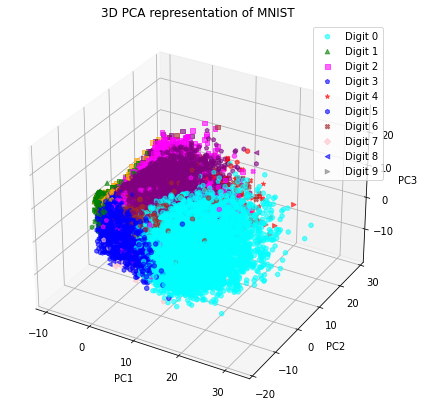

In [83]:
shapes = ['o', '^', 's', 'p', '*', 'h', 'X', 'D', '<', '>']
colors = ['red', 'blue', 'green', 'purple', 'orange', 'cyan', 'magenta', 'brown', 'pink', 'gray']

# Plot in 3D

plot_mnist_in_3d(mnist_train_3d,shapes,colors)

### Question D

In [84]:
import numpy as np
from scipy.linalg import eigh,svd

class PrincipalComponentAnalysis_modified:
    def __init__(self,n_components=20):
        self.n_components = n_components
        self.eigen_vectors = None
        self.eigen_values = None
        self.cov_matrix = None
        self.mean = None  # Store mean for standardization
        self.std = None
        self.X=None

    def fit(self, X):
        self.X = np.array(X)
        
        # Step 2: Compute covariance matrix
        self.cov_matrix = np.cov(self.X.T)
        
        # Step 3: Compute eigenvalues and eigenvectors
        self.eigen_values, self.eigen_vectors = eigh(self.cov_matrix)
        max_abs_cols = np.argmax(np.abs(self.eigen_vectors), axis=0)
        signs = np.sign(self.eigen_vectors[max_abs_cols, range(self.eigen_vectors.shape[1])])
        self.eigen_vectors *= signs 

        
        idx = np.argsort(self.eigen_values)[::-1]
        self.eigen_values = self.eigen_values[idx]
        self.eigen_vectors = self.eigen_vectors[:, idx]
        # print('Eigen Values:',self.eigen_values)
        # print('Eigen Vectors:',self.eigen_vectors)
        print('Eigen Vector shape:',self.eigen_vectors.shape)

        return self
    
    def transform(self):
        principal_components = self.eigen_vectors[:, :self.n_components]
        components_at_random = np.random.choice(20, 3, replace=False)
        print('Components:\n',components_at_random)
        X_transformed = np.dot(self.X,principal_components[:,components_at_random])
        return X_transformed

In [85]:
mnist_pca = PrincipalComponentAnalysis_modified()
mnist_pca.fit(X_scaled_train)

Eigen Vector shape: (784, 784)


Components:
 [ 9  6 13]


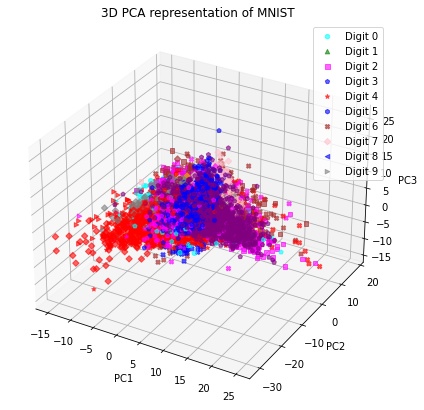

Components:
 [ 4 17  6]


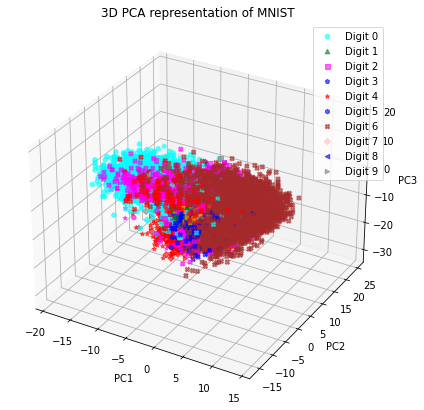

Components:
 [ 1 16  2]


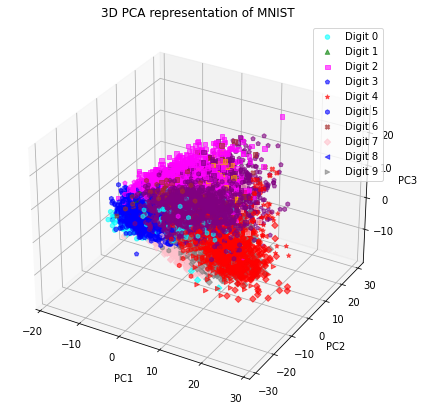

Components:
 [ 4 12  3]


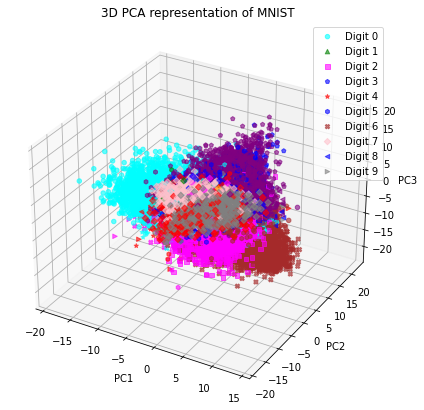

Components:
 [ 8 16  2]


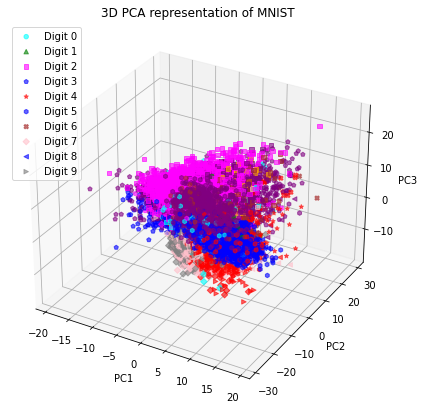

In [86]:
for i in range(5):
    mnist_3d = mnist_pca.transform()
    plot_mnist_in_3d(mnist_3d,shapes,colors)

## Problem 5

#### Question A

In [89]:
import pandas as pd
path_1 = 'HW_3A_Data/threecircles.txt'
path_2 = 'HW_3A_Data/twoSpirals.txt'
circles_df = pd.read_csv(path_1,names=['X','Y','Z'],sep=',')
spirals_df = pd.read_csv(path_2,names=['X','Y','Z'],sep='\t')

In [90]:
spirals_df

,X,Y,Z
0,10.5192,-0.7170,-1.0
1,0.9987,-9.9681,-1.0
2,3.5763,8.3756,-1.0
3,1.9236,-10.6448,-1.0
4,8.1583,-5.9066,-1.0
...,...,...,...
995,6.6583,2.7518,1.0
996,-4.1388,-6.6074,1.0
997,-1.0998,-6.9606,1.0
998,5.3105,4.6691,1.0


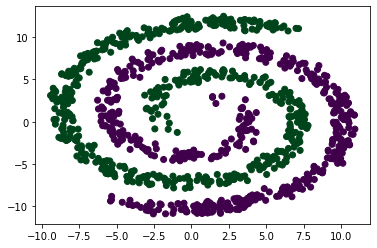

In [91]:
plt.scatter(spirals_df['X'],spirals_df['Y'],cmap='PRGn',c=spirals_df['Z'])
plt.show()

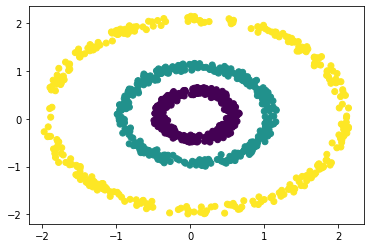

In [92]:
plt.scatter(circles_df['X'],circles_df['Y'],cmap='viridis',c=circles_df['Z'])
plt.show()

In [93]:
X_train,X_test,y_train,y_test = train_test_split(spirals_df[['X','Y']],spirals_df['Z'],test_size=0.2)
spiral_log_reg = LogisticRegression()
spiral_log_reg.fit(X_train,y_train)
y_pred = spiral_log_reg.predict(X_test)
acc = accuracy_score(y_test,y_pred)

In [94]:
print('Accuracy of logistic regression on original spriral dataset:%0.2f'%acc)

Accuracy of logistic regression on original spriral dataset:0.69


In [95]:
X_train,X_test,y_train,y_test = train_test_split(circles_df[['X','Y']],circles_df['Z'],test_size=0.2)
circle_log_reg = LogisticRegression()
circle_log_reg.fit(X_train,y_train)
y_pred = circle_log_reg.predict(X_test)
acc = accuracy_score(y_test,y_pred)

In [96]:
print('Accuracy of logistic regression on original circles dataset:%0.2f'%acc)

Accuracy of logistic regression on original circles dataset:0.27


#### Question B

In [97]:
import numpy as np
import math
from scipy.linalg import eigh
from sklearn.metrics import pairwise_distances

class KernelPCA:
    
    def __init__(self, sigma=3, batch_size=100):
        self.sigma = sigma
        self.batch_size = batch_size
        self.eigen_vectors = None
        self.eigen_values = None
        self.K = None 
        
    def fit(self, X):
        X = np.array(X)
        N = X.shape[0]
        
        # Compute the full pairwise distance matrix
        self.K = np.zeros((N, N))  # Initialize kernel matrix
#         no_of_batches = math.ceil(N / self.batch_size)
        
#         for i in range(no_of_batches):
#             start = i * self.batch_size
#             end = min(start + self.batch_size, N)
        distances = pairwise_distances(X, X, metric='euclidean')
        
        self.K = np.exp(-distances / (2*self.sigma^2))
        
        # Normalize Kernel (Centering the Kernel Matrix)
        U = np.ones((N, N)) / N  # Outer product matrix
        self.K = self.K - U @ self.K - self.K @ U + U @ self.K @ U
        
        # Compute Eigenvalues and Eigenvectors
        self.eigen_values, self.eigen_vectors = eigh(self.K)
        max_abs_cols = np.argmax(np.abs(self.eigen_vectors), axis=0)
        signs = np.sign(self.eigen_vectors[max_abs_cols, range(self.eigen_vectors.shape[1])])
        self.eigen_vectors *= signs 
        
        # Sort eigenvalues in descending order
        idx = np.argsort(self.eigen_values)[::-1]
        self.eigen_values = self.eigen_values[idx]
        self.eigen_vectors = self.eigen_vectors[:, idx]
        
        return self
    
    def get_projections(self,n_components):
        principal_components = self.eigen_vectors[:,:n_components]
        projections = np.dot(self.K,principal_components)
        return projections


### Question C

In [98]:
circles_k_pca = KernelPCA()
circles_k_pca.fit(circles_df)

In [101]:
X_trans = circles_k_pca.get_projections(20)
X= [X_trans[i][0] for i in range(X_trans.shape[0]) ]
Y= [X_trans[i][1] for i in range(X_trans.shape[0]) ]

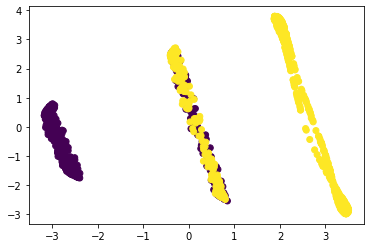

In [102]:
plt.scatter(X,Y,cmap='viridis',c=spirals_df['Z'])
plt.show()

In [103]:
X_train,X_test,y_train,y_test = train_test_split(np.array(X_trans),circles_df['Z'],test_size=0.2)
circles_log_reg = LogisticRegression()
circle_log_reg.fit(X_train,y_train)

LogisticRegression()

In [104]:
y_pred = circle_log_reg.predict(X_test)
acc = accuracy_score(y_test,y_pred)
print('Accuracy of logistic regression on original circles dataset:%0.2f'%acc)

Accuracy of logistic regression on original circles dataset:1.00


In [105]:
spiral_k_pca = KernelPCA()
spiral_k_pca.fit(spirals_df)

In [106]:
X_trans = spiral_k_pca.get_projections(2)

X= [X_trans[i][0] for i in range(X_trans.shape[0]) ]
Y= [X_trans[i][1] for i in range(X_trans.shape[0]) ]


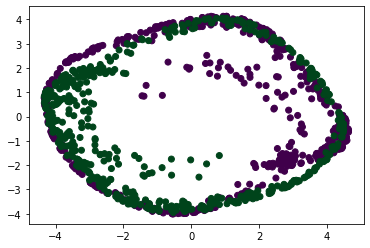

In [107]:
plt.scatter(X,Y,cmap='PRGn',c=spirals_df['Z'])
plt.show()

In [108]:
X_train,X_test,y_train,y_test = train_test_split(np.array(X_trans),spirals_df['Z'],test_size=0.2)
spiral_log_reg = LogisticRegression()
spiral_log_reg.fit(X_train,y_train)

LogisticRegression()

In [109]:
y_pred = spiral_log_reg.predict(X_test)
acc = accuracy_score(y_test,y_pred)
print('Accuracy of logistic regression on original Spirals dataset:%0.2f'%acc)

Accuracy of logistic regression on original Spirals dataset:0.69


### Now let us try different Dimensions

In [112]:
dims = [5,10,15,20,25,30,35,40,45,50]
for T in dims:
    X_trans = circles_k_pca.get_projections(T)
    X_train,X_test,y_train,y_test = train_test_split(np.array(X_trans),circles_df['Z'],test_size=0.2)
    circles_log_reg = LogisticRegression()
    circle_log_reg.fit(X_train,y_train)
    y_pred = circle_log_reg.predict(X_test)
    acc = accuracy_score(y_test,y_pred)
    print(f'Accuracy of logistic regression on circles with D={T}: %0.2f'% acc)

Accuracy of logistic regression on circles with D=5: 1.00
Accuracy of logistic regression on circles with D=10: 1.00
Accuracy of logistic regression on circles with D=15: 1.00
Accuracy of logistic regression on circles with D=20: 1.00
Accuracy of logistic regression on circles with D=25: 1.00
Accuracy of logistic regression on circles with D=30: 1.00
Accuracy of logistic regression on circles with D=35: 1.00
Accuracy of logistic regression on circles with D=40: 1.00
Accuracy of logistic regression on circles with D=45: 1.00
Accuracy of logistic regression on circles with D=50: 1.00


In [113]:
dims = [5,10,15,20,25,30,35,40,45,50]
for T in dims:
    X_trans = spiral_k_pca.get_projections(T)
    X_train,X_test,y_train,y_test = train_test_split(np.array(X_trans),spirals_df['Z'],test_size=0.2)
    circles_log_reg = LogisticRegression()
    circle_log_reg.fit(X_train,y_train)
    y_pred = circle_log_reg.predict(X_test)
    acc = accuracy_score(y_test,y_pred)
    print(f'Accuracy of logistic regression on spirals with D={T}: %0.2f'% acc)

Accuracy of logistic regression on spirals with D=5: 0.68
Accuracy of logistic regression on spirals with D=10: 0.73
Accuracy of logistic regression on spirals with D=15: 0.99
Accuracy of logistic regression on spirals with D=20: 0.99
Accuracy of logistic regression on spirals with D=25: 1.00
Accuracy of logistic regression on spirals with D=30: 1.00
Accuracy of logistic regression on spirals with D=35: 1.00
Accuracy of logistic regression on spirals with D=40: 1.00
Accuracy of logistic regression on spirals with D=45: 1.00
Accuracy of logistic regression on spirals with D=50: 1.00


So, here we are getting 100% accuracy in both circles and spirals dataset with minimum Dimension=5 and Dimensions=25